In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Gunashekar Chenna\Desktop\ML\Titanic.csv")

In [3]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
import seaborn as sns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Survived       891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


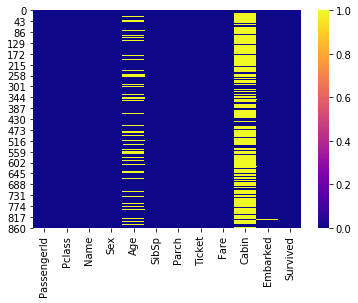

In [7]:
sns.heatmap(df.isnull(), cmap='plasma')

In [8]:
df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)

In [9]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


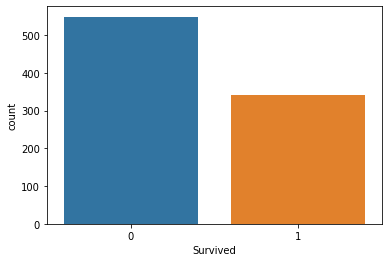

In [10]:
sns.countplot(x='Survived', data=df)

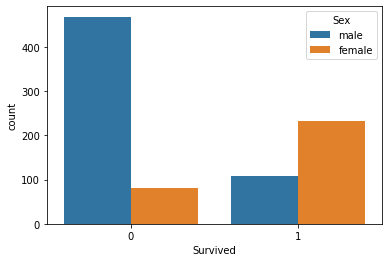

In [11]:
sns.countplot(x='Survived', hue = 'Sex', data=df)

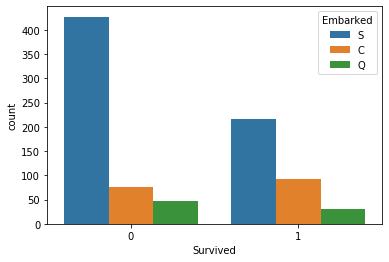

In [12]:
sns.countplot(x='Survived', hue = 'Embarked', data=df)

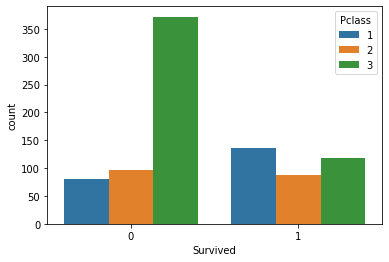

In [13]:
sns.countplot(x='Survived', hue = 'Pclass', data=df)

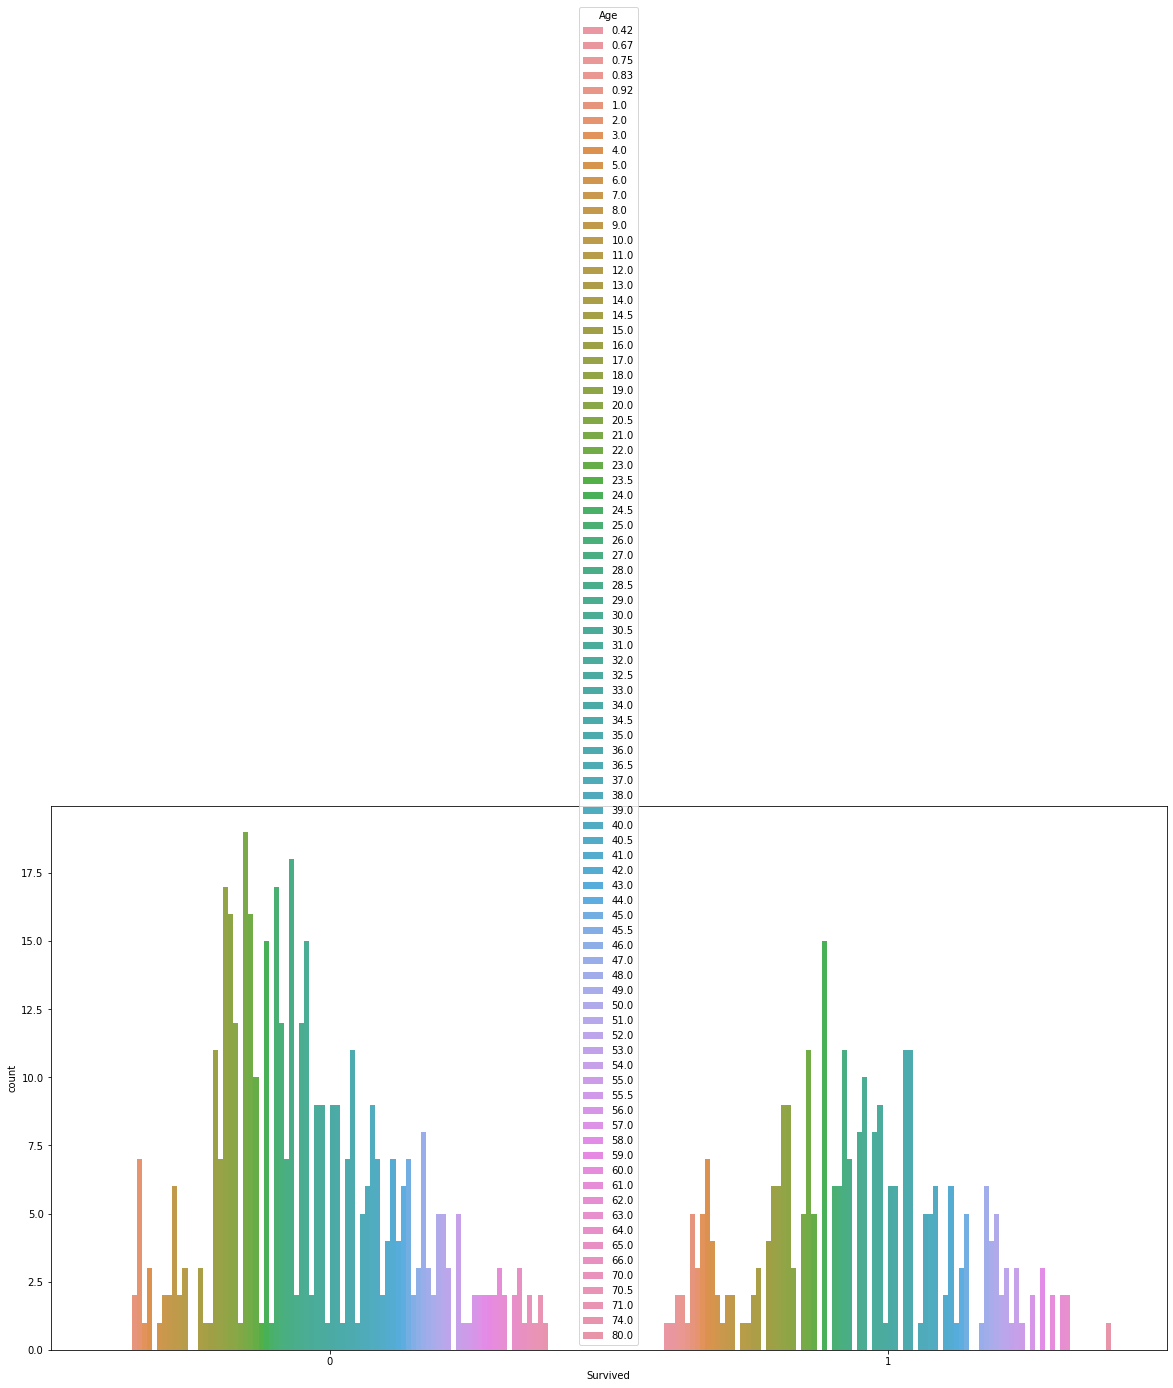

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='Survived', hue = 'Age', data=df)


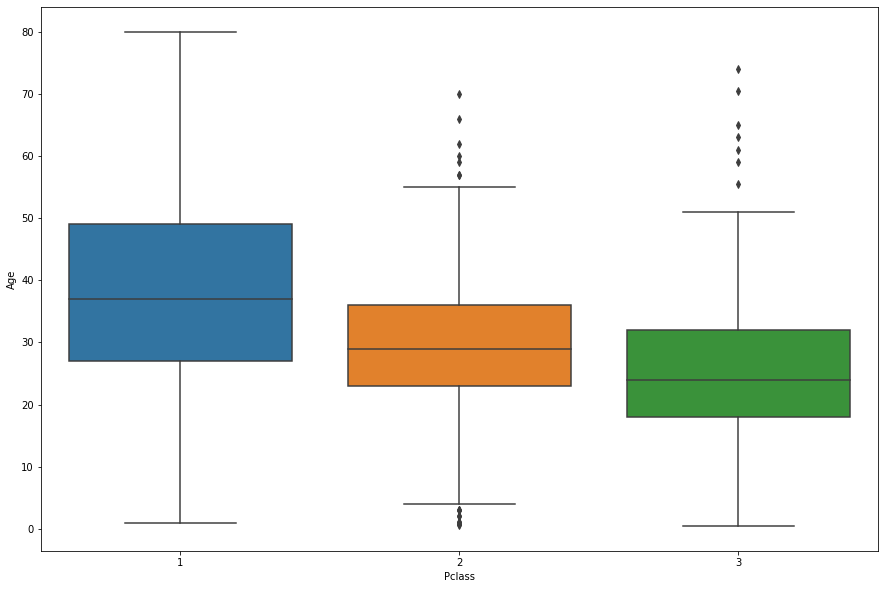

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y = 'Age', data=df)

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:

df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

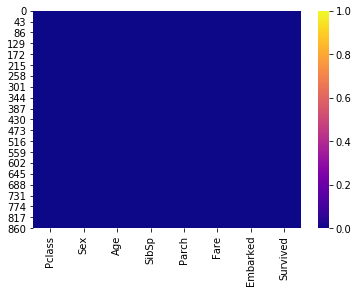

In [18]:
sns.heatmap(df.isnull(), cmap='plasma')

In [19]:
gender = pd.get_dummies(df['Sex'], drop_first=True)

In [20]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [21]:
em = pd.get_dummies(df['Embarked'],drop_first=True)

In [22]:
em

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [23]:
df.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

In [24]:
df

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,1
888,3,24.0,1,2,23.4500,0
889,1,26.0,0,0,30.0000,1


In [25]:
df = pd.concat([df,gender, em], axis = 1)

In [26]:
df

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,3,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,1
887,1,19.0,0,0,30.0000,1,0,0,1
888,3,24.0,1,2,23.4500,0,0,0,1
889,1,26.0,0,0,30.0000,1,1,0,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']

In [29]:
x,y

(     Pclass   Age  SibSp  Parch     Fare  male  Q  S
 0         3  22.0      1      0   7.2500     1  0  1
 1         1  38.0      1      0  71.2833     0  0  0
 2         3  26.0      0      0   7.9250     0  0  1
 3         1  35.0      1      0  53.1000     0  0  1
 4         3  35.0      0      0   8.0500     1  0  1
 ..      ...   ...    ...    ...      ...   ... .. ..
 886       2  27.0      0      0  13.0000     1  0  1
 887       1  19.0      0      0  30.0000     0  0  1
 888       3  24.0      1      2  23.4500     0  0  1
 889       1  26.0      0      0  30.0000     1  0  0
 890       3  32.0      0      0   7.7500     1  1  0
 
 [891 rows x 8 columns], 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 1)

In [31]:
x_train, x_test, y_train, y_test

(     Pclass   Age  SibSp  Parch     Fare  male  Q  S
 301       3  24.0      2      0  23.2500     1  1  0
 309       1  30.0      0      0  56.9292     0  0  0
 516       2  34.0      0      0  10.5000     0  0  1
 120       2  21.0      2      0  73.5000     1  0  1
 570       2  62.0      0      0  10.5000     1  0  1
 ..      ...   ...    ...    ...      ...   ... .. ..
 715       3  19.0      0      0   7.6500     1  0  1
 767       3  30.5      0      0   7.7500     0  1  0
 72        2  21.0      0      0  73.5000     1  0  1
 235       3  24.0      0      0   7.5500     0  0  1
 37        3  21.0      0      0   8.0500     1  0  1
 
 [712 rows x 8 columns],      Pclass   Age  SibSp  Parch     Fare  male  Q  S
 862       1  48.0      0      0  25.9292     0  0  1
 223       3  24.0      0      0   7.8958     1  0  1
 84        2  17.0      0      0  10.5000     0  0  1
 680       3  24.0      0      0   8.1375     0  1  0
 535       2   7.0      0      2  26.2500     0  0  1
 .

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred = reg.predict(x_test)

In [35]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
cm

array([[94, 12],
       [24, 49]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred)

0.7988826815642458

In [40]:
from sklearn import tree

In [40]:
decision_tree = tree.DecisionTreeClassifier()

In [41]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
y_predict = model.predict(x_test)

In [44]:
y_predict

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test, y_predict)

0.7653631284916201

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)

In [46]:
y_predict1=clf.predict(x_test)

In [47]:
y_predict1

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [ ]:
from sklearn import metrics

In [48]:
metrics.accuracy_score(y_test, y_predict1)

0.7821229050279329

In [ ]:
[logistic_regression, decision_tree, random_forest]